# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

## 1. Preparación de datos

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
ruta = "./Ventas (1).csv"
df = pd.read_csv(ruta)
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [46]:
df["Fecha"] = pd.to_datetime(df["Fecha"] )
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [47]:
escala = MinMaxScaler(feature_range=(0, 1))
columns_no_deseadas = df.drop(["Fecha", "Ventas"], axis=1).columns
normado = escala.fit_transform(df[columns_no_deseadas])
df_normado = pd.DataFrame(data=normado, columns=columns_no_deseadas)
df_normado["Ventas"] = df["Ventas"]
df_normado["Fecha"] = df["Fecha"]
df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [15]:
X = df_normado.drop(["Fecha", "Ventas"], axis=1)
y = df["Ventas"]

In [16]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

## 2. Análisis Exploratorio de Datos (EDA)

- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

In [17]:
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


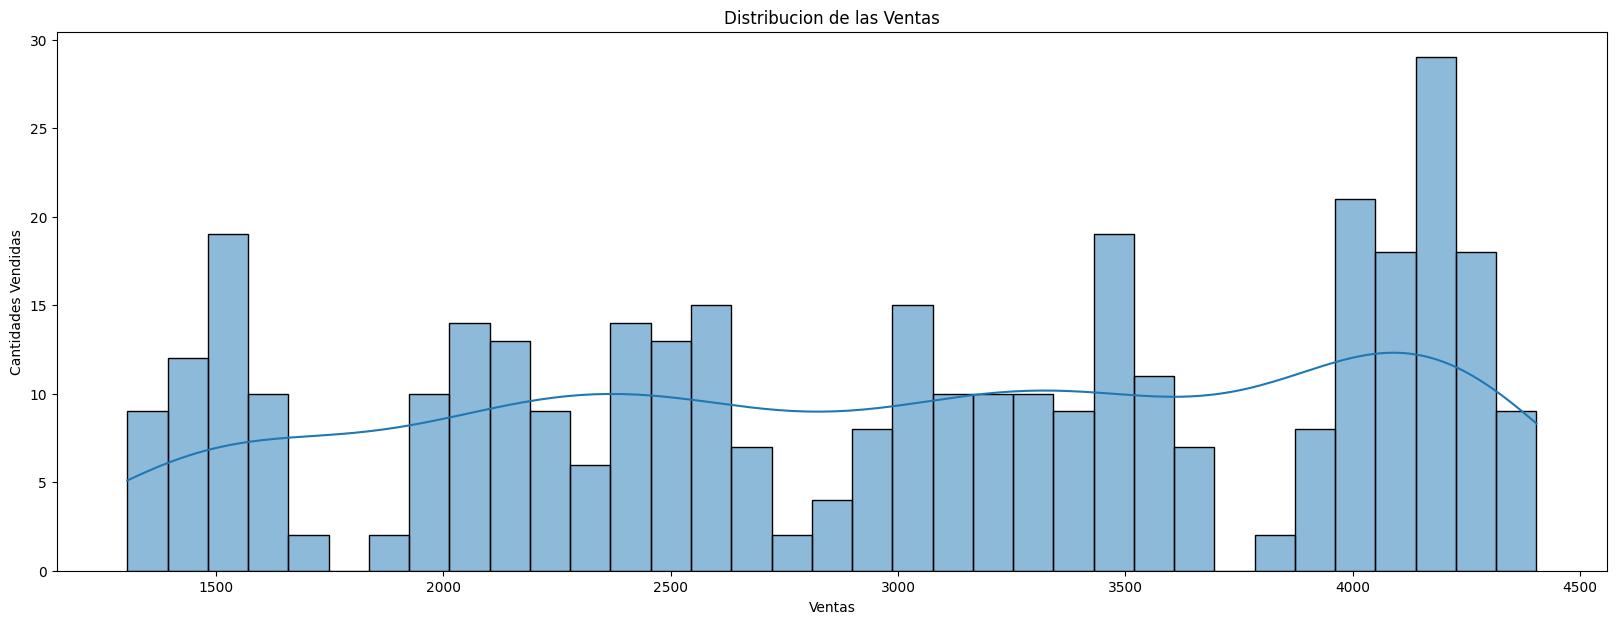

In [52]:
plt.figure(figsize=(20,7))
sns.histplot(df["Ventas"], bins=35, kde=True)
plt.title("Distribucion de las Ventas")
plt.xlabel("Ventas")
plt.ylabel("Cantidades Vendidas");

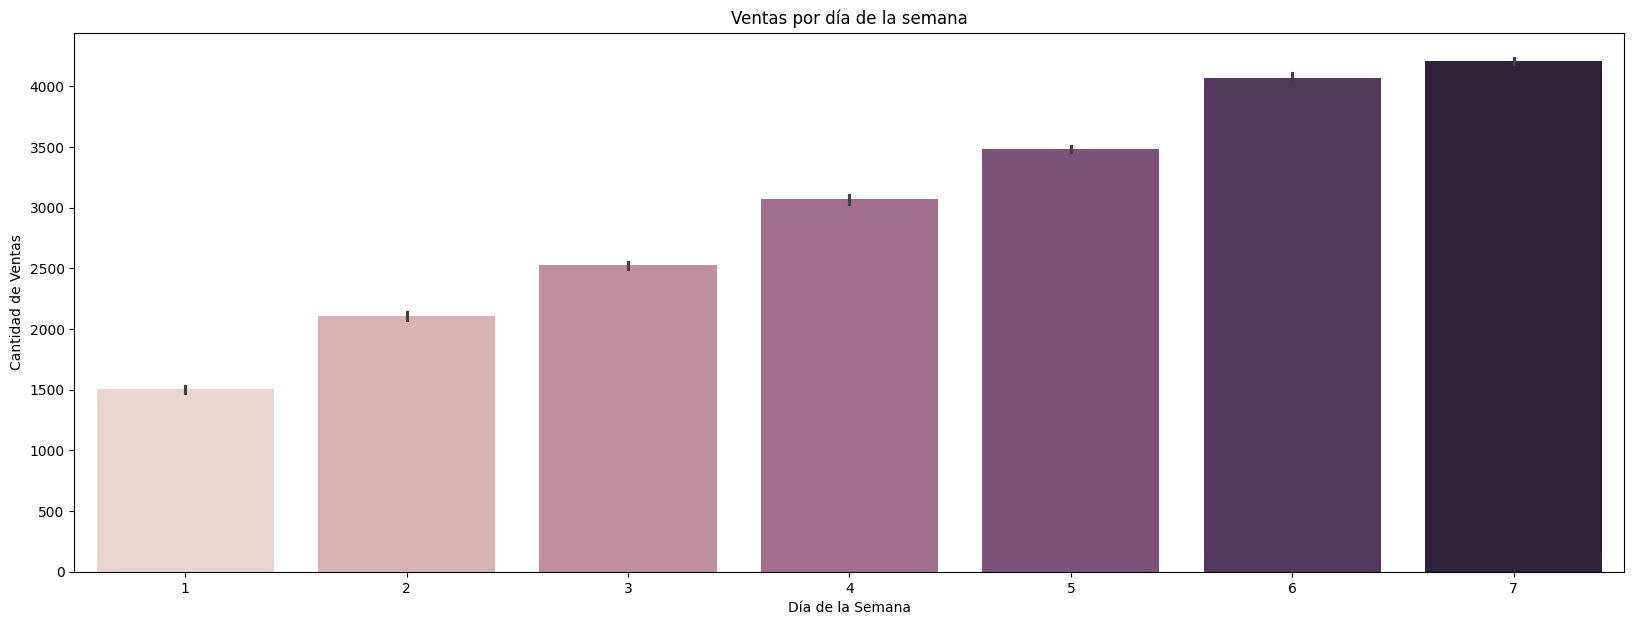

In [59]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x="DíaDeLaSemana", y="Ventas", hue="DíaDeLaSemana", legend=False)
plt.title("Ventas por día de la semana")
plt.xlabel('Día de la Semana')
plt.ylabel("Cantidad de Ventas");


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25284\2869657303.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Sin Promocion", "Con Promocion"])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25284\2869657303.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Sin Festivo", "Festivo"])


Text(0.5, 1.0, 'Comportamiento de las ventas con promociones y festivos')

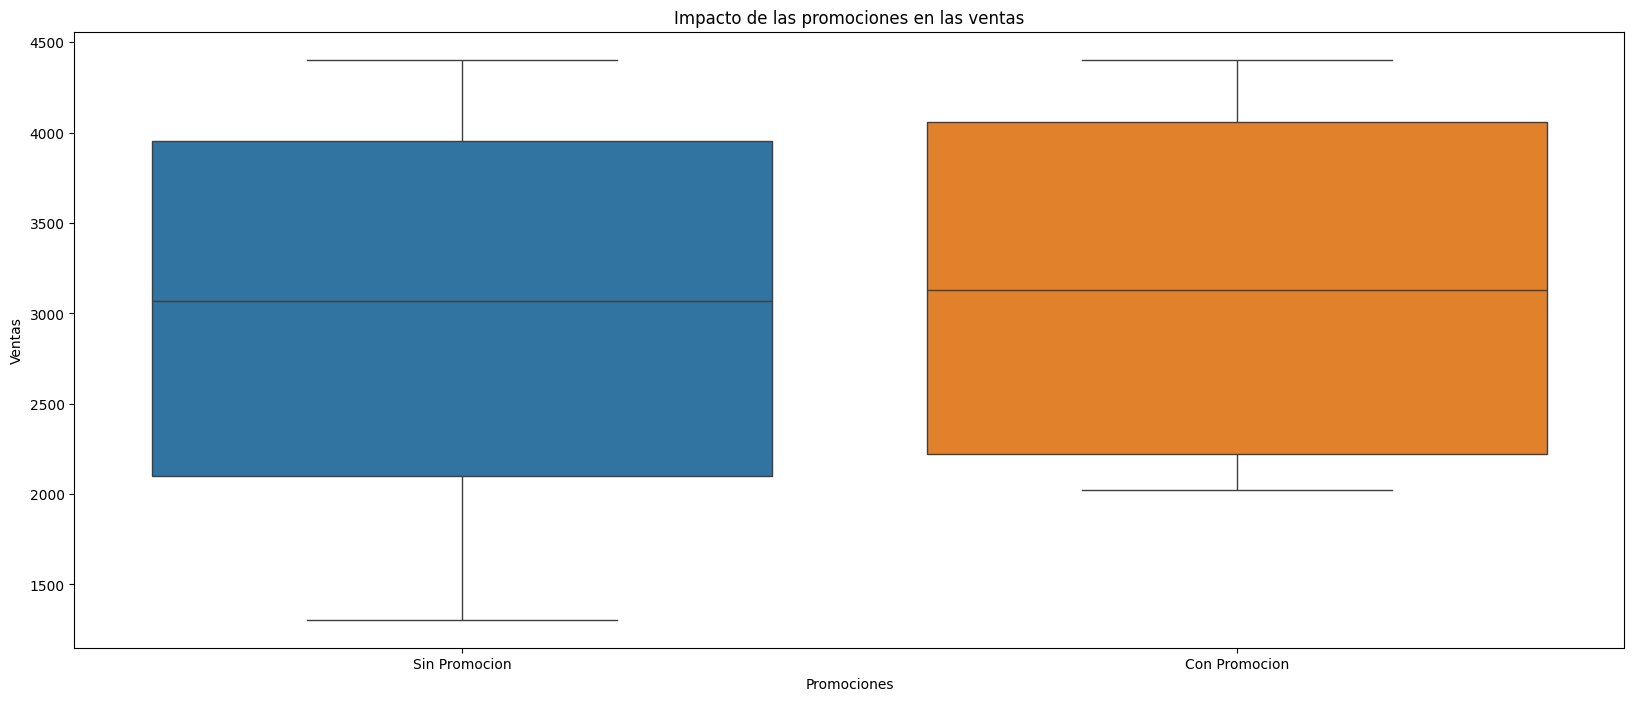

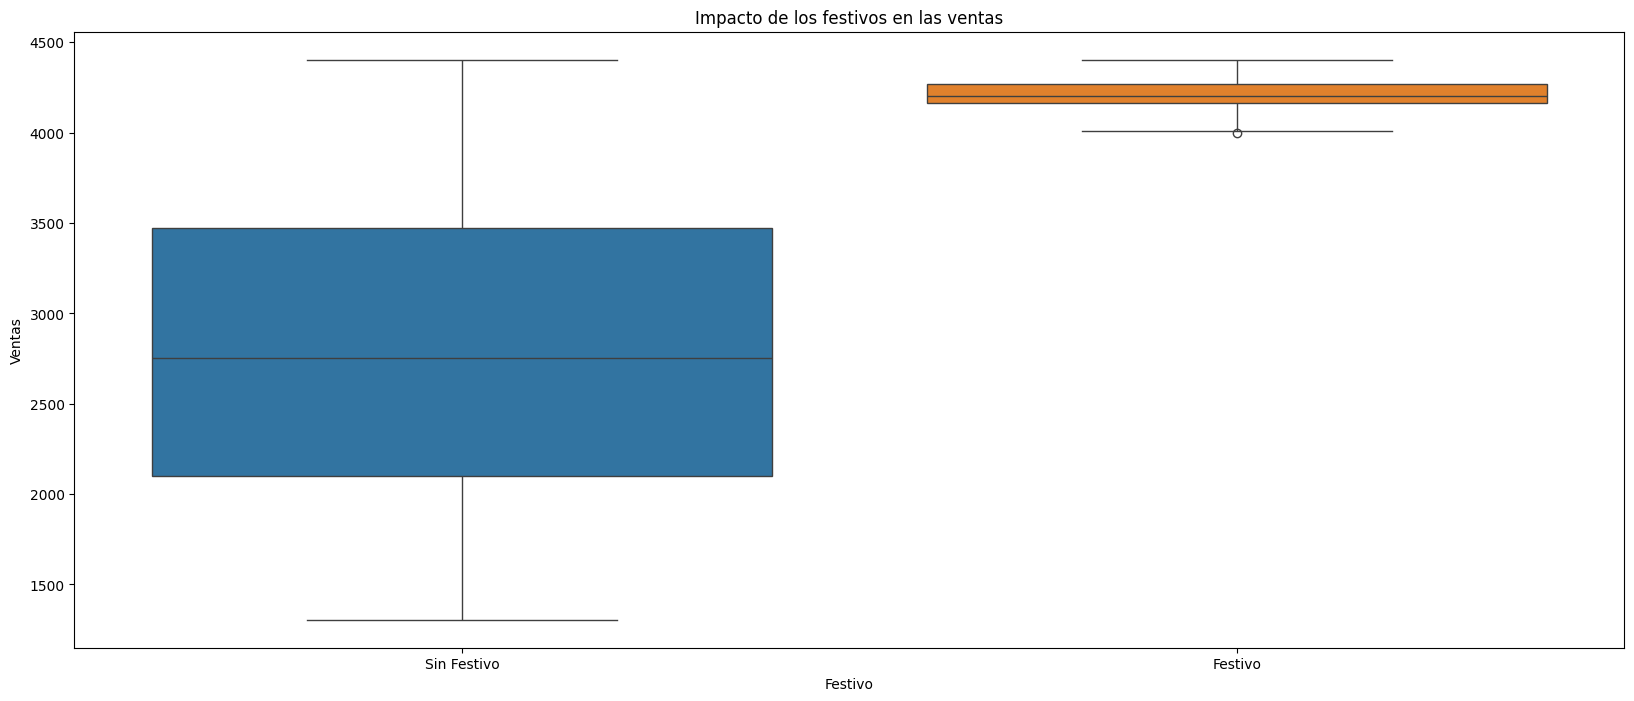

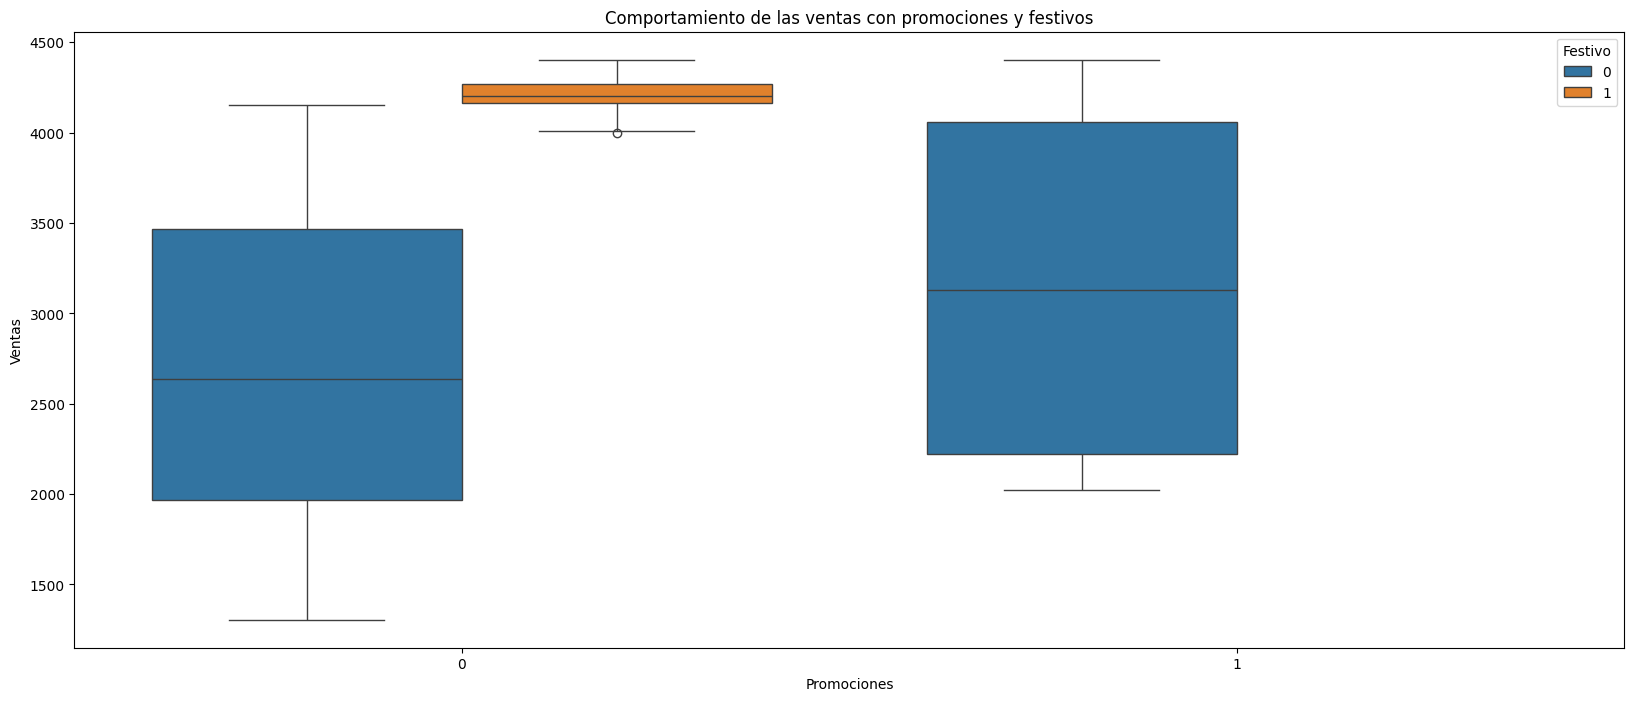

In [81]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=df, x="Promociones", y="Ventas", hue="Promociones", legend=False)
ax.set_xticklabels(["Sin Promocion", "Con Promocion"])
plt.title("Impacto de las promociones en las ventas")

plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=df, x="Festivo", y="Ventas", hue="Festivo", legend=False)
ax.set_xticklabels(["Sin Festivo", "Festivo"])
plt.title("Impacto de los festivos en las ventas")

plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x="Promociones", y="Ventas", hue="Festivo", legend=True)
plt.title("Comportamiento de las ventas con promociones y festivos")

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

In [84]:
modelos = [
    ("Regresión Logística", LinearRegression()),
    ("Arbol de Decisión", DecisionTreeRegressor(random_state=36)),
    ("Bosque Aleatorio", RandomForestRegressor(random_state=36))
]

In [87]:
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje:.5f}')

Regresión Logística: 0.99242
Arbol de Decisión: 0.99235
Bosque Aleatorio: 0.99234


**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.


In [88]:
modelo = LinearRegression()

In [89]:
modelo.fit(X,y)

LinearRegression()

In [92]:
prediccion = modelo.predict(X_prueba)


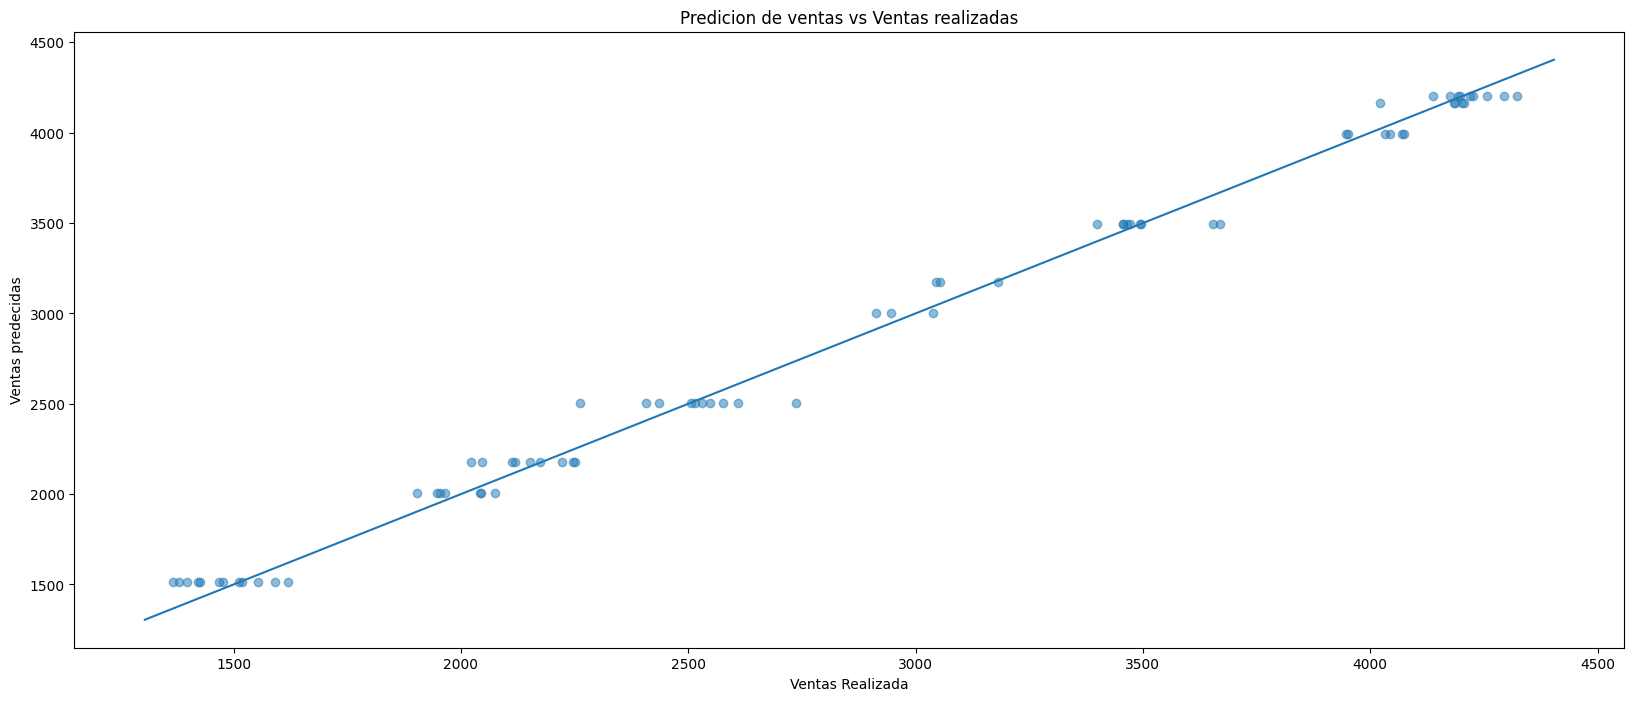

In [100]:
plt.figure(figsize=(20,8))
plt.scatter(y_prueba, prediccion, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Ventas Realizada")
plt.ylabel("Ventas predecidas")
plt.title("Predicion de ventas vs Ventas realizadas");

In [105]:
df_prueba = pd.DataFrame({'Real': y_prueba, 'Predicho': prediccion})
df_prueba = df_prueba.sort_index()

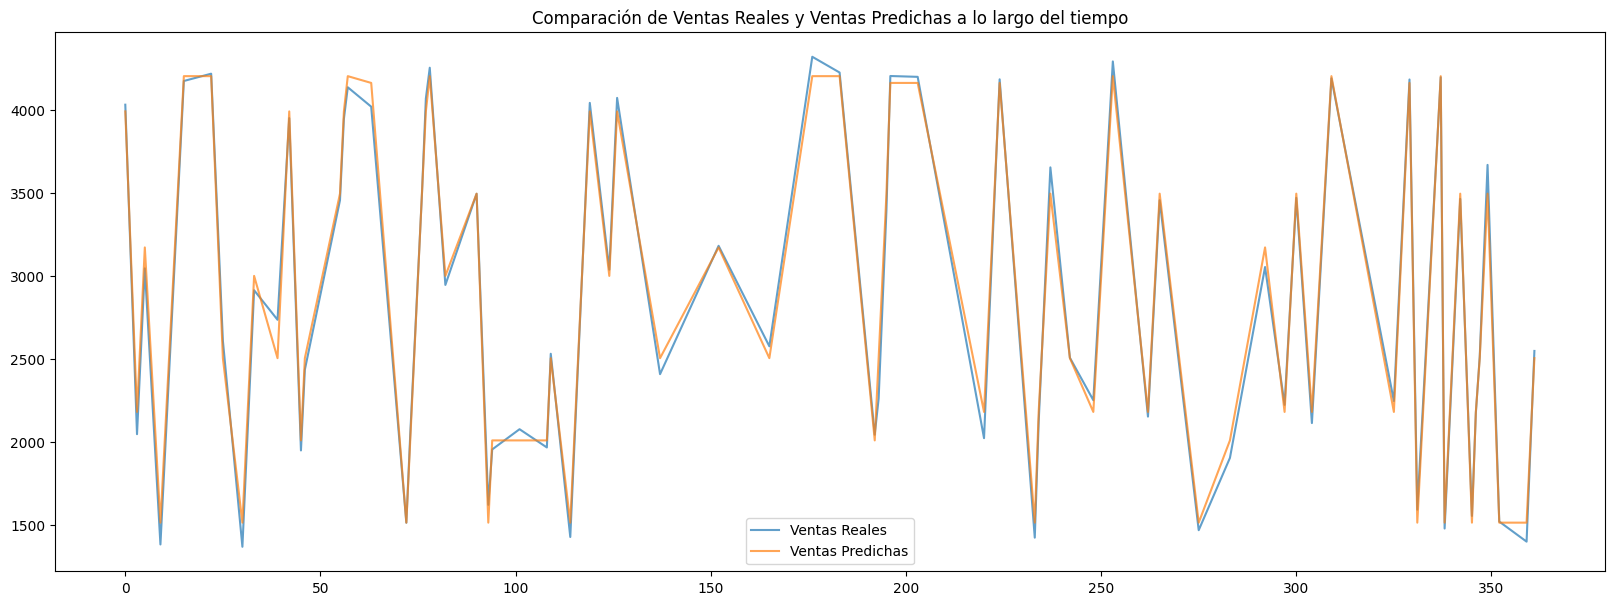

In [106]:
plt.figure(figsize=(20, 7))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');